In [1]:
import os
os.chdir('D:/IIM/Competitions/Resolvr') # changing working directory to required file location
os.getcwd()

'D:\\IIM\\Competitions\\Resolvr'

In [77]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pal = ['#009786','#7CCC4E', '#1E2A39']
sns.set(style="white", color_codes = True)
sns.set_palette(pal)
%matplotlib inline


import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

In [58]:
data = pd.read_csv('resolvr.csv')
data.head().T

,0,1,2,3,4
Gender,Male,Male,Female,Female,Male
Customer Type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,13,25,26,25,61
Type of Travel,Personal Travel,Business travel,Business travel,Business travel,Business travel
Class,Non Business,Business,Business,Business,Business
Flight Distance,460,235,1142,562,214
Inflight wifi service,3,3,2,2,3
Departure/Arrival time convenient,4,2,2,5,3
Ease of Online booking,3,3,2,5,3
Gate location,1,3,2,5,3


In [84]:
data.describe()
descriptive_stats = data.describe()
descriptive_stats.to_csv('Descriptive.csv')

In [60]:
# segregating on the basis of measurement scale
ratio = data[['Age','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes']]
nominal = data[['Gender','Customer Type','Type of Travel']]
ordinal = data[['Class']]
interval = data.iloc[:,6:20]

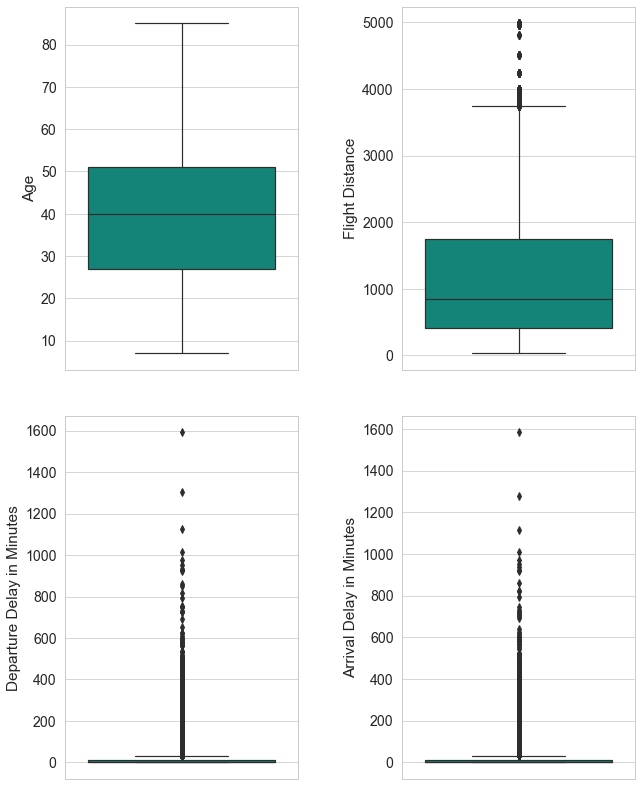

In [68]:
sns.set_context("paper", font_scale=1.6)
fig, ax = plt.subplots(2, 2, figsize=(10, 12))
for variable, subplot in zip(ratio, ax.flatten()):
    sns.boxplot(y = ratio[variable], ax=subplot)
fig.tight_layout(pad=3.0)


In [7]:
# Analysing FLight Distance, Departure Delay and Arrival Delay

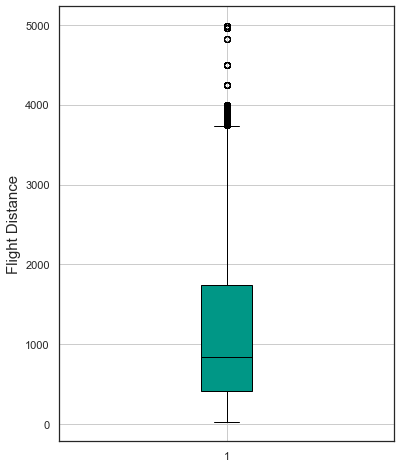

In [78]:
# Flight Distance
plt.figure(figsize=(6,8))
box = plt.boxplot(data['Flight Distance'] , patch_artist=True,medianprops=dict(color= "black"))
plt.ylabel('Flight Distance', fontsize=15);
plt.grid()


In [9]:
[item.get_ydata()[0] for item in box['caps']]

[31.0, 3739.0]

In [10]:
[flier.get_ydata()[0] for flier in box["fliers"]]

[3747]

In [11]:
outliers = [flier.get_ydata() for flier in box["fliers"]]

In [12]:
np.shape(outliers)

(1, 2854)

In [13]:
#There are 2854 ouliers, but this is due to natural variation, checked the mimimum and maximum from net, values are okay. 
#No treatment required till now

In [14]:
# Departure Delay

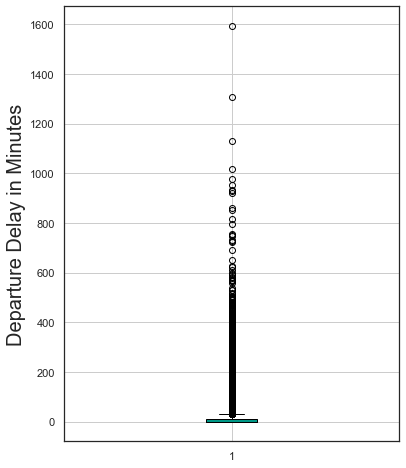

In [79]:
plt.figure(figsize=(6,8))
box = plt.boxplot(data['Departure Delay in Minutes'] , patch_artist=True,medianprops=dict(color= "black"))
plt.ylabel('Departure Delay in Minutes', fontsize=20);
plt.grid()

In [16]:
# Clearly something is off, large number of outliers

In [17]:
[item.get_ydata()[0] for item in box['caps']]

[0.0, 30.0]

In [18]:
outliers = [flier.get_ydata() for flier in box["fliers"]]
np.shape(outliers)

(1, 18092)

In [19]:
# A large number of outliers will result in more variance and inaccurate predictions. Needs to be treated

In [20]:
# Applying log transformation
data_1 = data.copy() 
data_1['ln(Dep_Delay)'] = np.log((data_1['Departure Delay in Minutes'])+1)

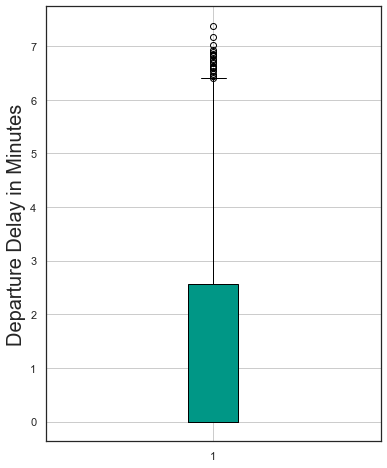

In [80]:
plt.figure(figsize=(6,8))
box = plt.boxplot(data_1['ln(Dep_Delay)'] , patch_artist=True,medianprops=dict(color= "black"))
plt.ylabel('Departure Delay in Minutes', fontsize=20);
plt.grid()

In [133]:
[item.get_ydata()[0] for item in box['caps']]

[0.0, 6.398594934535208]

In [134]:
[flier.get_ydata()[0] for flier in box["fliers"]]

[7.174724309836376]

In [135]:
outliers = [flier.get_ydata() for flier in box["fliers"]]
np.shape(outliers)

(1, 24)

In [136]:
# Number of outliers has been drastically reduced
# we can either remove ( as number is less ) or
# let it be (capturing natural variance)

In [137]:
# Arrival Delay

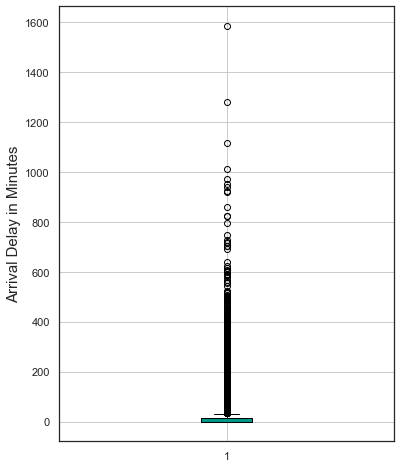

In [81]:
plt.figure(figsize=(6,8))
box = plt.boxplot(data['Arrival Delay in Minutes'] , patch_artist=True,medianprops=dict(color= "black"))
plt.ylabel('Arrival Delay in Minutes', fontsize=15);
plt.grid()

In [139]:
outliers = [flier.get_ydata() for flier in box["fliers"]]
np.shape(outliers)

(1, 17610)

In [140]:
data_1['ln(Arr_Delay)'] = np.log((data_1['Arrival Delay in Minutes'])+1)

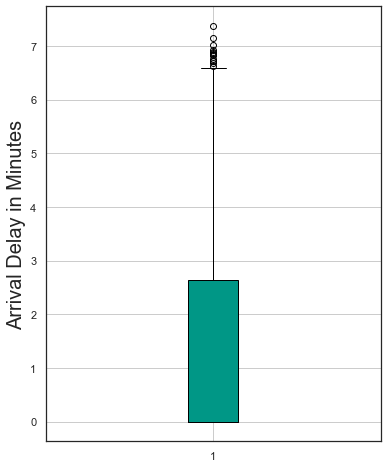

In [82]:
plt.figure(figsize=(6,8))
box = plt.boxplot(data_1['ln(Arr_Delay)'] , patch_artist=True,medianprops=dict(color= "black"))
plt.ylabel('Arrival Delay in Minutes', fontsize=20);
plt.grid()

In [56]:
outliers = [flier.get_ydata() for flier in box["fliers"]]
np.shape(outliers)

(1, 14)

In [145]:
data[nominal.columns].describe().T

,count,unique,top,freq
Gender,129840,2,Female,65881
Customer Type,129840,2,Loyal Customer,106072
Type of Travel,129840,2,Business travel,89666


In [146]:
data[ordinal.columns].describe().T

,count,unique,top,freq
Class,129840,2,Non Business,67700


In [147]:
data[interval.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Inflight wifi service,129840.0,2.728812,1.329345,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129840.0,3.057694,1.526751,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,129840.0,2.756993,1.401754,0.0,2.0,3.0,4.0,5.0
Gate location,129840.0,2.977010,1.278550,0.0,2.0,3.0,4.0,5.0
Food and drink,129840.0,3.204798,1.329928,0.0,2.0,3.0,4.0,5.0
Online boarding,129840.0,3.252611,1.350747,0.0,2.0,3.0,4.0,5.0
Seat comfort,129840.0,3.441520,1.319225,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,129840.0,3.358141,1.334033,0.0,2.0,4.0,4.0,5.0
On-board service,129840.0,3.383041,1.287121,0.0,2.0,4.0,4.0,5.0
Leg room service,129840.0,3.351009,1.316232,0.0,2.0,4.0,4.0,5.0


In [148]:
#nominal, ordinal interval data don't have any outliers

In [149]:
data_1.to_csv("resolvr.csv", index = False)